Dados: https://drive.google.com/file/d/1211eIfoHmSOp74lsBklqW5UN2K3eVcNz/view

In [ ]:
import pandas as pd

df = pd.read_csv('dados.csv', names = ['tipo', 'idade', 'tempo_op', 'substituicao'], header=0)
df.info()

In [21]:
# Transformando parâmetros texto (1ª coluna) em parâmetros numéricos

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['tipo'] = label_encoder.fit_transform(df['tipo'])

# Monofásico = 0, Trifásico = 1

<Axes: >

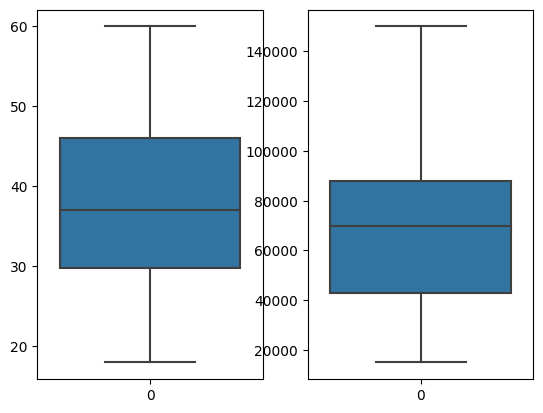

In [22]:
# Detecção e remoção de outliers

import matplotlib.pyplot as plt
import seaborn as sb

f, axes = plt.subplots(1, 2)

sb.boxplot(df['idade'], ax=axes[0])
sb.boxplot(df['tempo_op'], ax=axes[1])

# Pelo gráfico dá pra ver q não tem outliers

In [23]:
# Montanto um novo df que tem a mesma quantidade de casos com saida em 0 e em 1

n0, n1 = 0, 0
qtdCadaSaida = 143
df_novo = pd.DataFrame(columns = df.columns)

for c in range(len(df)):

  if df['substituicao'][c] == 1 and n1 < qtdCadaSaida:
    df_novo.loc[n0 + n1] = df.iloc[c, 0:9]
    n1 += 1

  elif df['substituicao'][c] == 0 and n0 < qtdCadaSaida:
    df_novo.loc[n0 + n1] = df.iloc[c, 0:9]
    n0 += 1

  if n1 == qtdCadaSaida and n0 == qtdCadaSaida:
    break

In [ ]:
# Normalização dos dados

from sklearn.preprocessing import MaxAbsScaler
import numpy as np

dados = MaxAbsScaler().fit_transform(df_novo)

In [25]:
# Separação dos dados em conjunto de treinamento e de teste

from sklearn.model_selection import train_test_split as tts

saidas = dados[0:, 3]
entradas = dados[0:, 0:3]

inTreino, inTeste, outTreino, outTeste = tts(entradas, saidas)

In [26]:
# Treinando NN e aplicando no conjunto de teste

from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(3), activation='tanh', max_iter=3000)
nn.fit(inTreino, outTreino)

outPredicao = nn.predict(inTeste)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(outTeste, outPredicao))
print(confusion_matrix(outTeste, outPredicao))

              precision    recall  f1-score   support

         0.0       0.94      0.82      0.88        40
         1.0       0.81      0.94      0.87        32

    accuracy                           0.88        72
   macro avg       0.88      0.88      0.87        72
weighted avg       0.88      0.88      0.88        72

[[33  7]
 [ 2 30]]
